# Logistic Regression - Multi-Layer Case(For Mnist)

# Library

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

# Load data and data check

In [2]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

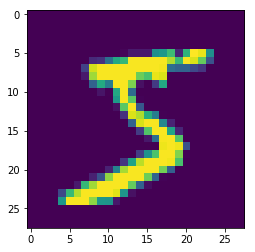

[[[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 ..., 
 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]]
[5 0 4 ..., 5 6 8]


In [3]:
# data check
plt.figure()
plt.imshow(x_train[0])
plt.show()
print(x_train)
print(y_train)

# Data preprocessing (x reshape, x nomalize, y onehot)

In [4]:
shape = x_train.shape[1:]

# x data reshape
reshaped_x_train = x_train.reshape(-1, np.prod(shape))
reshaped_x_test = x_test.reshape(-1, np.prod(shape))

# x data normalization
X_train = reshaped_x_train / 255.
X_test = reshaped_x_test / 255.

# y data one hot encoding
Y_train = np.eye(10)[y_train.reshape(-1)]
Y_test = np.eye(10)[y_test.reshape(-1)]

In [5]:
print('X data shape:', X_train.shape, X_test.shape)
print('Y data shape:', Y_train.shape, Y_test.shape)
print()

print('X train data')
print(X_train)
print('X test data')
print(X_test)
print()

print('Y train data')
print(Y_train)
print('Y test data')
print(Y_test)

X data shape: (60000, 784) (10000, 784)
Y data shape: (60000, 10) (10000, 10)

X train data
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
X test data
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]

Y train data
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]
Y test data
[[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


# Multi Layer Logistic Regression

## Hyper parameter setting

In [6]:
# hypter parameter setting
learning_rate = 1e-1
training_epochs = 25
display_step = 5
batch_size = 32
act = tf.nn.relu
h = 200

## Make model with get_variable

In [7]:
tf.reset_default_graph()

# place holder
tf_X = tf.placeholder(tf.float32, [None, np.prod(shape)])
tf_Y = tf.placeholder(tf.float32, [None, 10])

# get variables
w1 = tf.get_variable('w1', [np.prod(shape), h])
b1 = tf.get_variable('b1', [h])
w2 = tf.get_variable('w2', [h, 10])
b2 = tf.get_variable('b2', [10])

# model
hidden1 = act(tf_X @ w1 + b1)
pred = tf.nn.softmax(hidden1 @ w2 + b2)

# cross entropy loss
loss = tf.reduce_mean(-tf.reduce_sum(tf_Y * tf.log(pred), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
# tf.reset_default_graph()

# # place holder
# tf_X = tf.placeholder(tf.float32, [None, np.prod(shape)])
# tf_Y = tf.placeholder(tf.float32, [None, 10])

# # model
# hidden1 = tf.layers.dense(tf_X, h, activation=act)
# logit = tf.layers.dense(hidden1, 10)
# pred = tf.nn.softmax(logit)

# # cross entropy loss
# loss = tf.losses.softmax_cross_entropy(tf_Y, logit)
# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

## Train and result (without batch)

In [8]:
# train
init = tf.global_variables_initializer()

with tf.Session() as sess:
    # init
    sess.run(init)
    
    # train
    losses = [sess.run(loss, feed_dict={tf_X: X_train, tf_Y: Y_train})]  # init loss list
    for epoch in range(training_epochs):
        # get loss in sess.run
        _, l = sess.run([optimizer, loss], feed_dict={tf_X:X_train, tf_Y:Y_train})
        losses.append(l)  # save loss

        if (epoch + 1) % display_step == 0:
            print("Epoch:", epoch + 1, "\tLoss:", l) 

    print("최적화 완료") 

    # result
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(tf_Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    test_accuracy, y_test_pred = sess.run([accuracy, pred], feed_dict={tf_X: X_test, tf_Y: Y_test})
    print("정확도:", test_accuracy)

Epoch: 5 	Loss: 1.97429
Epoch: 10 	Loss: 1.61573
Epoch: 15 	Loss: 1.3338
Epoch: 20 	Loss: 1.1272
Epoch: 25 	Loss: 0.979587
최적화 완료
정확도: 0.8117


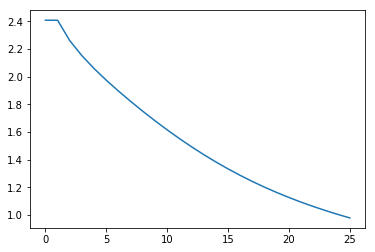

array([[ 920,    0,   16,    4,    2,   34,   20,    4,   25,   16],
       [   0, 1090,   44,    8,   13,   21,   19,   38,   32,   18],
       [   6,   31,  803,   32,   16,   22,   21,   28,   23,   14],
       [   5,    5,   67,  858,    1,  137,    5,   10,   65,   13],
       [   0,    1,   13,    2,  754,   18,   10,   15,   14,  131],
       [   5,    0,    0,   28,    1,  518,   14,    0,   24,    8],
       [  32,    4,   26,   16,   35,   54,  865,    3,   19,    3],
       [   2,    0,   18,   19,    5,   34,    0,  864,   22,   69],
       [  10,    3,   39,   35,   15,   33,    4,   19,  736,   28],
       [   0,    1,    6,    8,  140,   21,    0,   47,   14,  709]], dtype=int64)

In [9]:
# plot losses
plt.figure()
plt.plot(losses)
plt.show()

# print confusion matrix
confusion_matrix(np.argmax(y_test_pred, 1), y_test)

## Train and result (with batch)

In [11]:
# train
init = tf.global_variables_initializer()

with tf.Session() as sess:
    # init
    sess.run(init)
    
    # train
    total_batch = int( len(X_train)/batch_size )  # total batch: number of batches
    losses = [sess.run(loss, feed_dict={tf_X: X_train, tf_Y: Y_train})]  # init loss list
    for epoch in range(0, training_epochs):
        for i in range(total_batch):
            ### get batch
            x_batch = X_train[i*batch_size:(i+1)*batch_size]
            y_batch = Y_train[i*batch_size:(i+1)*batch_size]

            # get loss in sess.run ### batch input
            _, l = sess.run([optimizer, loss], feed_dict={tf_X: x_batch, tf_Y: y_batch}) 
        losses.append(l)  # save loss

        if (epoch + 1) % display_step == 0:
            print("Epoch:", epoch + 1, "\tLoss:", l) 

    print("최적화 완료") 

    # result
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(tf_Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    test_accuracy, y_test_pred = sess.run([accuracy, pred], 
                                          feed_dict={tf_X: X_test, tf_Y: Y_test})
    print("정확도:", test_accuracy)

Epoch: 5 	Loss: 0.207243
Epoch: 10 	Loss: 0.183274
Epoch: 15 	Loss: 0.163898
Epoch: 20 	Loss: 0.143147
Epoch: 25 	Loss: 0.125685
최적화 완료
정확도: 0.9768


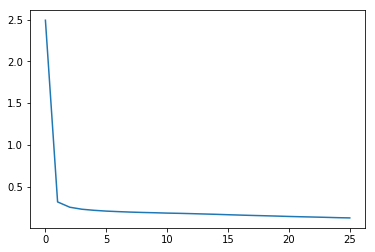

array([[ 969,    0,    5,    0,    2,    3,    6,    1,    5,    3],
       [   0, 1126,    2,    0,    0,    0,    3,    4,    0,    4],
       [   2,    4, 1010,    5,    3,    0,    3,   11,    5,    1],
       [   0,    0,    3,  987,    1,    6,    1,    4,    9,    5],
       [   1,    0,    1,    0,  964,    1,    4,    4,    5,   10],
       [   3,    1,    0,    4,    0,  875,    7,    0,    4,    5],
       [   1,    2,    3,    0,    2,    4,  932,    0,    3,    1],
       [   1,    1,    2,    3,    1,    0,    0,  994,    4,    2],
       [   2,    1,    6,    2,    0,    1,    2,    1,  935,    2],
       [   1,    0,    0,    9,    9,    2,    0,    9,    4,  976]], dtype=int64)

In [12]:
# plot losses
plt.figure()
plt.plot(losses)
plt.show()

# print confusion matrix
confusion_matrix(np.argmax(y_test_pred, 1), y_test)

## Train and result (with batch - iteration losses)

In [13]:
# train
init = tf.global_variables_initializer()

with tf.Session() as sess:
    # init
    sess.run(init)
    
    # train
    total_batch = int( len(X_train)/batch_size )  # total batch: number of batches
    losses = [sess.run(loss, feed_dict={tf_X: X_train, tf_Y: Y_train})]  # init loss list
    iteration_losses = [sess.run(loss, feed_dict={tf_X: X_train, tf_Y: Y_train})] ### init iteration losses
    for epoch in range(0, training_epochs):
        # shuffle
        idx = np.random.permutation(len(X_train))
        shuffled_X_train = X_train[idx]
        shuffled_Y_train = Y_train[idx]
        
        for i in range(total_batch):
            # get batch
            x_batch = shuffled_X_train[i*batch_size:(i+1)*batch_size]
            y_batch = shuffled_Y_train[i*batch_size:(i+1)*batch_size]
            
            # get loss in sess.run # batch input
            _, l = sess.run([optimizer, loss], feed_dict={tf_X: x_batch, tf_Y: y_batch}) 
            iteration_losses.append(l)  ### save iteration loss
        losses.append(l)  # save loss

        if (epoch + 1) % display_step == 0:
            print("Epoch:", epoch + 1, "\tLoss:", l) 

    print("최적화 완료") 

    # result
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(tf_Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    test_accuracy, y_test_pred = sess.run([accuracy, pred], 
                                          feed_dict={tf_X: X_test, tf_Y: Y_test})
    print("정확도:", test_accuracy)

Epoch: 5 	Loss: 0.0981348
Epoch: 10 	Loss: 0.0428511
Epoch: 15 	Loss: 0.0168581
Epoch: 20 	Loss: 0.0113865
Epoch: 25 	Loss: 0.0602061
최적화 완료
정확도: 0.9795


test accuracy: 0.9795


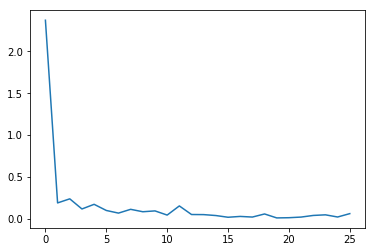

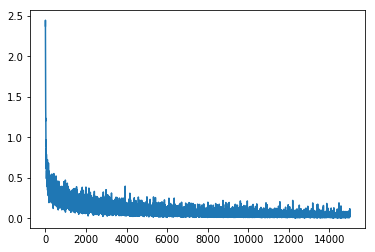

array([[ 967,    0,    4,    0,    2,    2,    5,    0,    3,    2],
       [   0, 1122,    1,    0,    0,    0,    3,    2,    0,    3],
       [   1,    3, 1008,    2,    2,    0,    1,    6,    4,    0],
       [   2,    1,    2,  992,    1,   10,    1,    1,    7,    5],
       [   2,    0,    3,    0,  958,    0,    1,    0,    4,    6],
       [   1,    1,    0,    3,    0,  869,    4,    1,    4,    1],
       [   2,    3,    3,    0,    3,    5,  941,    0,    3,    1],
       [   2,    2,    7,    3,    3,    1,    1, 1013,    7,    5],
       [   1,    3,    4,    3,    1,    3,    1,    1,  940,    1],
       [   2,    0,    0,    7,   12,    2,    0,    4,    2,  985]], dtype=int64)

In [14]:
print('test accuracy:', test_accuracy)
# plot losses
plt.figure()
plt.plot(losses)
plt.show()
# plot iteration losses
plt.figure()
plt.plot(iteration_losses)
plt.show()

# print confusion matrix
confusion_matrix(np.argmax(y_test_pred, 1), y_test)